In [12]:
#imports
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn


In [21]:
# loading in data and cleaning
df = pd.read_csv('drug200.csv')
df.head(15)

df.drop_duplicates()
df.dropna(axis=1)
df.rename(columns = {'Na_to_K':'Sodium-Potassium'}, inplace = True)

df

,Age,Sex,BP,Cholesterol,Sodium-Potassium,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


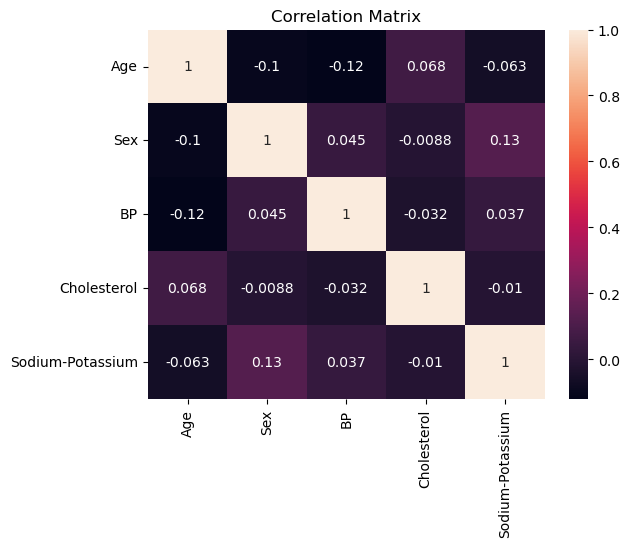

In [22]:
#heatmap
corr_df = pd.DataFrame(df.copy())

corr_df = corr_df.replace("F", 1)
corr_df = corr_df.replace("M", 0)
corr_df = corr_df.replace("HIGH", 4)
corr_df = corr_df.replace("NORMAL", 3)
corr_df = corr_df.replace("LOW", 2)
corr_df = corr_df.replace("DrugY", 10)
corr_df = corr_df.replace("drugC", 11)
corr_df = corr_df.replace("drugX", 12)

corr_df

correlation = corr_df.corr ()
ax=plt.axes()
seaborn.heatmap (correlation, annot=True, ax=ax)
ax.set_title("Correlation Matrix")
plt.show()


In [30]:
#division of data for data exploration

y = df[df['Drug'] == 'DrugY']
c = df[df['Drug'] == 'drugC']
x = df[df['Drug'] == 'drugX']

y_df = pd.DataFrame(y)
c_df = pd.DataFrame(c)
x_df = pd.DataFrame(x)



y_chol_low = y_df[y_df['Cholesterol'] == 'LOW']
y_chol_norm = y_df[y_df['Cholesterol'] == 'NORMAL']
y_chol_high = y_df[y_df['Cholesterol'] == 'HIGH']
x_chol_low = x_df[x_df['Cholesterol'] == 'LOW']
x_chol_norm = x_df[x_df['Cholesterol'] == 'NORMAL']
x_chol_high = x_df[x_df['Cholesterol'] == 'HIGH']
c_chol_low = c_df[c_df['Cholesterol'] == 'LOW']
c_chol_norm = c_df[c_df['Cholesterol'] == 'NORMAL']
c_chol_high = c_df[c_df['Cholesterol'] == 'HIGH']

[Text(0.5, 1.0, 'Frequency of Sodium-Potassium Rations across people needing different Drugs')]

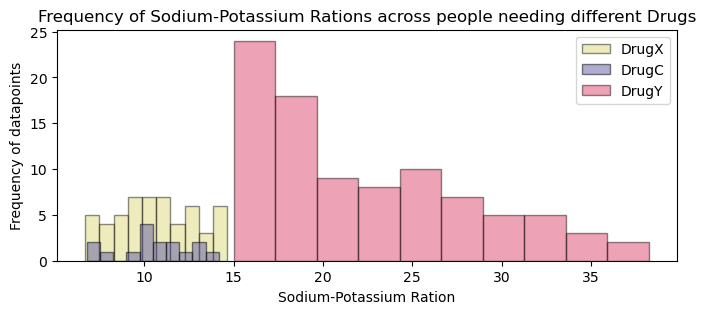

In [32]:
#data exploration
fig, axs = plt.subplots(1)
fig.set_figheight(3)
fig.set_figwidth(8)

axs.hist(x_df[['Sodium-Potassium']],
         alpha = 0.45, color = '#DBD56E', label="DrugX", ec="black")

axs.hist(c_df[['Sodium-Potassium']],
         alpha = 0.5, color = '#5F5AA2', label="DrugC", ec="black")
axs.hist(y_df[['Sodium-Potassium']],
         alpha = 0.45, color = '#D8315B', label="DrugY", ec="black")

axs.legend(loc='upper right', frameon=True)
axs.set(xlabel="Sodium-Potassium Ration")
axs.set(ylabel="Frequency of datapoints")
axs.set(title="Frequency of Sodium-Potassium Rations across people needing different Drugs")


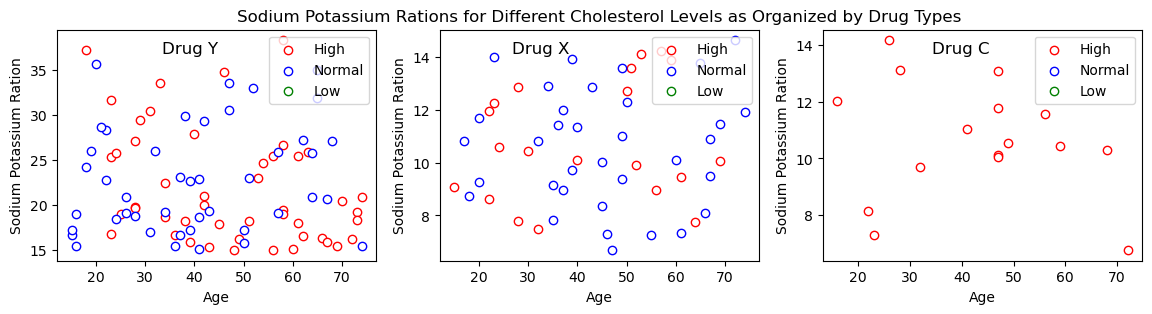

In [65]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(3)
fig.set_figwidth(14)

axs[0].scatter(y_chol_high[['Age']], y_chol_high[['Sodium-Potassium']], color = '#ffffff', label="High", ec="red")
axs[0].scatter(y_chol_norm[['Age']], y_chol_norm[['Sodium-Potassium']], color = '#ffffff', label="Normal", ec="blue")
axs[0].scatter(y_chol_low[['Age']], y_chol_low[['Sodium-Potassium']], color = '#ffffff', label="Low", ec="green")
axs[0].set(xlabel="Age")
axs[0].set(ylabel="Sodium Potassium Ration")
axs[0].legend(loc='upper right', frameon=True)
plt.figtext(0.2, 0.8, "Drug Y", wrap=True, horizontalalignment='left', fontsize=12)

#what was the age of people who bought different prices for fares
axs[1].scatter(x_chol_high[['Age']], x_chol_high[['Sodium-Potassium']], color = '#ffffff', label="High", ec="red")
axs[1].scatter(x_chol_norm[['Age']], x_chol_norm[['Sodium-Potassium']], color = '#ffffff', label="Normal", ec="blue")
axs[1].scatter(x_chol_low[['Age']], x_chol_low[['Sodium-Potassium']], color = '#ffffff', label="Low", ec="green")
axs[1].set(xlabel="Age")
axs[1].set(ylabel="Sodium Potassium Ration")
axs[1].legend(loc='upper right', frameon=True)
axs[1].set(title="Sodium Potassium Rations for Different Cholesterol Levels as Organized by Drug Types")
plt.figtext(0.45, 0.8, "Drug X", wrap=True, horizontalalignment='left', fontsize=12)


axs[2].scatter(c_chol_high[['Age']], c_chol_high[['Sodium-Potassium']], color = '#ffffff', label="High", ec="red")
axs[2].scatter(c_chol_norm[['Age']], c_chol_norm[['Sodium-Potassium']], color = '#ffffff', label="Normal", ec="blue")
axs[2].scatter(c_chol_low[['Age']], c_chol_low[['Sodium-Potassium']], color = '#ffffff', label="Low", ec="green")
axs[2].set(xlabel="Age")
axs[2].set(ylabel="Sodium Potassium Ration")
axs[2].legend(loc='upper right', frameon=True)
plt.figtext(0.75, 0.8, "Drug C", wrap=True, horizontalalignment='left', fontsize=12)

plt.show()


In [23]:
# data split

X = df.loc[:, ['Age', 'Sex', 'BP','Cholesterol', 'Sodium-Potassium']]
Y = df.loc[:, ['Drug']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .75)

In [9]:
le = preprocessing.LabelEncoder()


In [ ]:
#heatmap


